# Note
1. Melakukan percobaan build_models v4.0
2. Dilakukan pada hari Rabu, 03 Juli - Jum'at, 05 Juli 2024
3. Tempat di Kost
4. Meliputi Class: 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [ ]:
# pip install tensorflow

In [ ]:
# pip install keras

In [ ]:
# pip install opencv-python

In [ ]:
# pip install imutils

In [ ]:
# pip install matplotlib

In [ ]:
# pip install seaborn

In [ ]:
# pip install scikit-learn

# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [3]:
# import os
# import pandas as pd

# def create_labels_csv(DATASET_PATH, OUTPUT_CSV):
#     # List to store image file paths and their corresponding labels
#     data = []

#     # Traverse the dataset directory
#     for root, dirs, files in os.walk(DATASET_PATH):
#         for file in files:
#             if file.endswith(('.jpg', '.jpeg', '.png')):
#                 # Get the class label from the subdirectory name
#                 label = os.path.basename(root)
#                 # Get the full file path
#                 file_path = os.path.join(root, file)
#                 # Append to the data list
#                 data.append([file_path, label])
    
#     # Create a DataFrame from the data list
#     df = pd.DataFrame(data, columns=['file_path', 'label'])
    
#     # Save the DataFrame to a CSV file
#     df.to_csv(OUTPUT_CSV, index=False)
#     print(f'Labels CSV file created at: {OUTPUT_CSV}')

# # Usage

# DATASET_PATH = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\"
# OUTPUT_CSV = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\labels.csv"

# create_labels_csv(DATASET_PATH, OUTPUT_CSV)

In [4]:
import pandas as pd

path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,label
0,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
1,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
2,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
3,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
4,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba


Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ba is  138
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ca is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\da is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\dha is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ga is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ha is  126
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ja is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ka is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\la is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ma is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\na is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ng

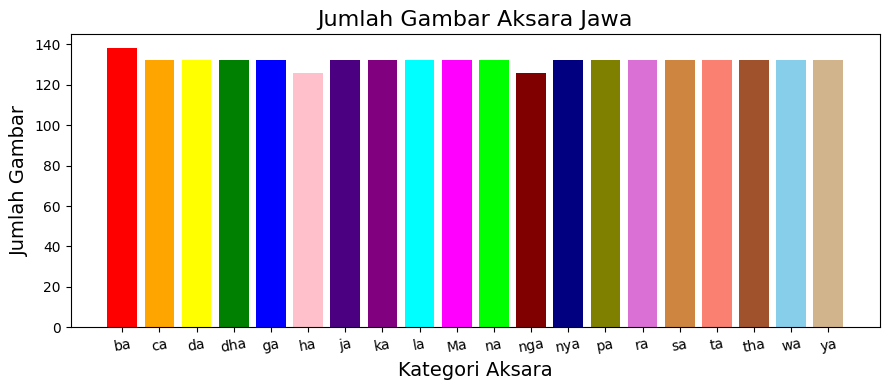

In [5]:
import matplotlib.pyplot as plt
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Jumlah File {link} is ", num_files)
    
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ba")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ca")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\da")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\dha")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ga")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ha")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ja")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ka")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\la")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ma")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\na")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\nga")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\nya")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\pa")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ra")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\sa")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ta")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\tha")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\wa")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ya")

# Define the input path aksara
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(9, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (112, 112)
INPUT_SHAPE = (112, 112, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

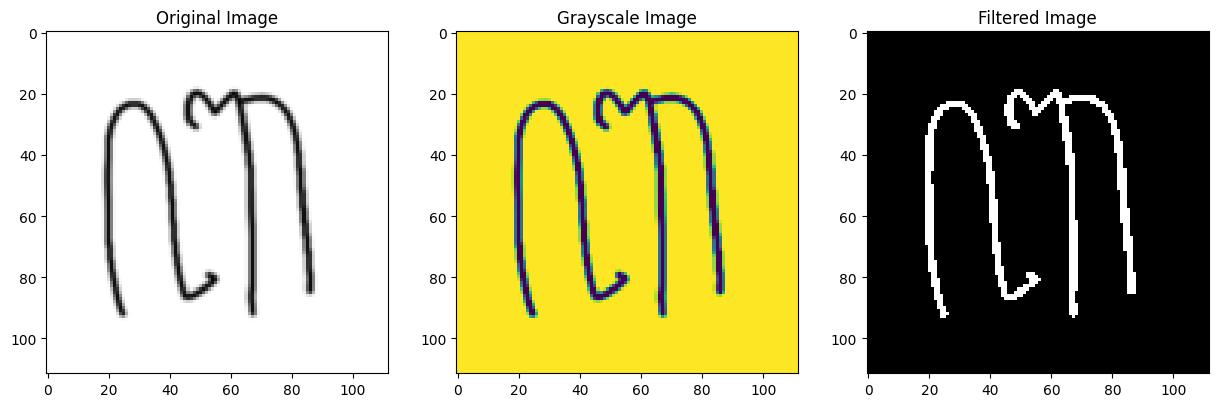

In [7]:
# Select one image to display
index_to_display = 0

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('on')

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)
plt.axis('on')

plt.subplot(1, 3, 3)
plt.title('Filtered Image')
# plt.imshow(filtered_image, cmap='gray')
plt.imshow(filtered_image, cmap='gray')
plt.axis('on')

plt.show()

In [8]:
# Reshape X_filtered
# X_filtered_reshaped = X_filtered.reshape(-1, 112, 112, 1).astype("float32") / 255  # Reshape dan normalisasi
X_filtered_reshaped = X_filtered.reshape(-1, 112, 112, 1)

print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (2634, 112, 112, 1)


In [9]:
# Train test split 
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered_reshaped, y_label, test_size=0.2, random_state=37)

In [10]:
print("x_train shape", X_train.shape)
print("x_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (2107, 112, 112, 1)
x_test shape (527, 112, 112, 1)
y_train shape (2107, 20)
y_test shape (527, 20)


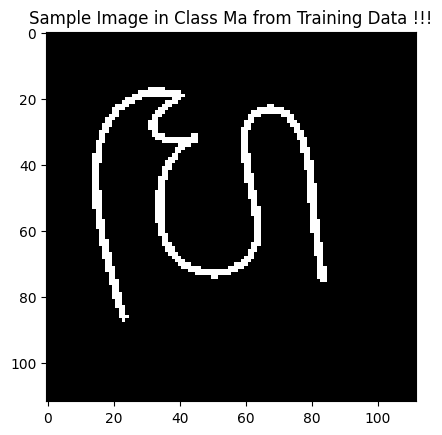

In [11]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

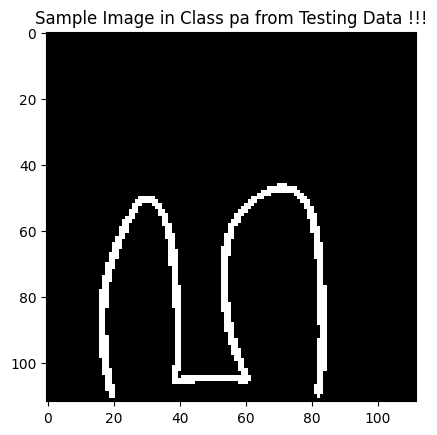

In [12]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[0], cmap='gray')
plt.title("Sample Image in Class {} from Testing Data !!!".format(AKSARA[np.argmax(y_test[0])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1 - Dropout(0.2) + learning_rate=0.001

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model with vgg16 architecture (5 blocks)
# Model CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(112, 112, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(20, activation='softmax'))

In [85]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)              │ (None, 110, 110, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_84          │ (None, 110, 110, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_85          │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_86          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_87          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_88          │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,121,876 (8.09 MB)

 Trainable params: 2,117,844 (8.08 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [86]:
# Train the model
history_v1 = model.fit(X_train, 
                       y_train, 
                       epochs=30, 
                       batch_size=64, 
                       validation_data=(X_test, y_test))

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.2180 - loss: 3.0182 - val_accuracy: 0.0531 - val_loss: 92.3175
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.7309 - loss: 0.8320 - val_accuracy: 0.0531 - val_loss: 70.0897
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.8903 - loss: 0.3295 - val_accuracy: 0.0664 - val_loss: 24.2865
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.9576 - loss: 0.1609 - val_accuracy: 0.3738 - val_loss: 5.0320
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.9615 - loss: 0.1136 - val_accuracy: 0.6945 - val_loss: 1.1964
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.9793 - loss: 0.0833 - val_accuracy: 0.9715 - val_loss: 0.0814
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.9855 - loss: 0.0560 - val_accuracy: 0.9905 - val_loss: 0.0310
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.9848 - loss: 0.0522 - val_accuracy: 0.9867 

In [87]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 387ms/step - accuracy: 0.9921 - loss: 0.0303
Loss: 0.035331230610609055
Accuracy: 0.9905123114585876


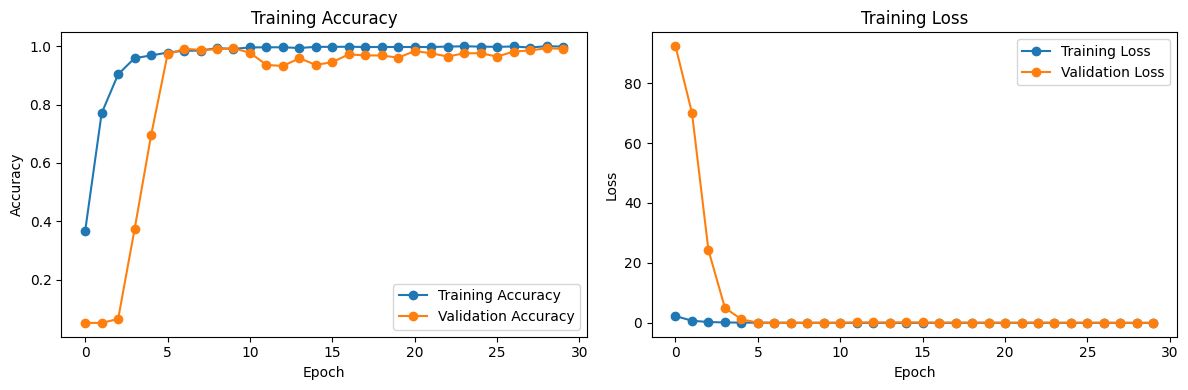

In [90]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v1.history.get('accuracy', [])
test_acc = history_v1.history.get('val_accuracy', [])
loss = history_v1.history.get('loss', [])
test_loss = history_v1.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, test_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Validation Loss', marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Tampilkan classification report yang lengkap
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 483ms/step
              precision    recall  f1-score   support

          ba       1.00      1.00      1.00        28
          ca       1.00      1.00      1.00        28
          da       1.00      1.00      1.00        26
         dha       1.00      1.00      1.00        36
          ga       1.00      1.00      1.00        24
          ha       1.00      1.00      1.00        24
          ja       1.00      1.00      1.00        27
          ka       1.00      1.00      1.00        20
          la       1.00      0.94      0.97        32
          Ma       1.00      1.00      1.00        27
          na       1.00      1.00      1.00        30
         nga       1.00      1.00      1.00        17
         nya       1.00      1.00      1.00        28
          pa       0.82      1.00      0.90        23
          ra       1.00      1.00      1.00        21
          sa       1.00      1.00      1.00        24
          ta       1.00      1.00      

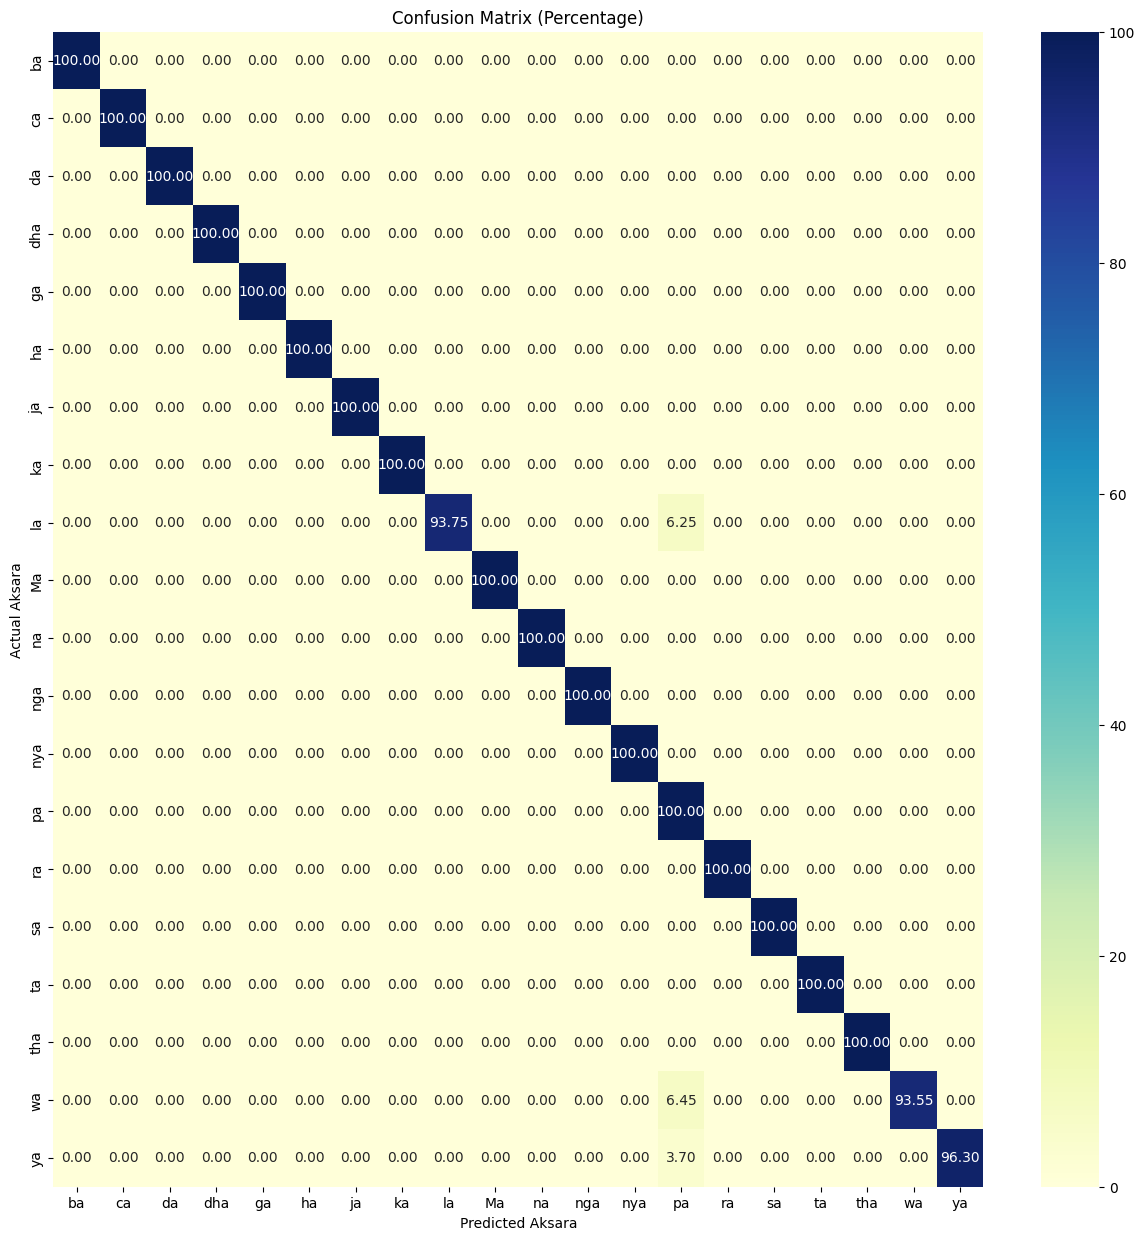

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(conf_matrix, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

# Display Confusion Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 2 - Dropout(0.1) + learning_rate=0.0001

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model with vgg16 architecture (5 blocks)
# Model CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(20, activation='softmax'))

In [62]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 110, 110, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 110, 110, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,121,876 (8.09 MB)

 Trainable params: 2,117,844 (8.08 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [63]:
# Train the model
history_v2 = model.fit(X_train, 
                       y_train, 
                       epochs=35, 
                       batch_size=64, 
                       validation_data=(X_test, y_test))

Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 229s 6s/step - accuracy: 0.1064 - loss: 3.5021 - val_accuracy: 0.0645 - val_loss: 3.6553
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step - accuracy: 0.3366 - loss: 2.1813 - val_accuracy: 0.0911 - val_loss: 3.3132
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 169s 5s/step - accuracy: 0.5325 - loss: 1.5117 - val_accuracy: 0.1860 - val_loss: 2.4414
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.6506 - loss: 1.1220 - val_accuracy: 0.4630 - val_loss: 1.7188
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 253s 6s/step - accuracy: 0.7585 - loss: 0.7911 - val_accuracy: 0.7211 - val_loss: 1.0667
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 156s 5s/step - accuracy: 0.8212 - loss: 0.5720 - val_accuracy: 0.8102 - val_loss: 0.7088
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 260s 6s/step - accuracy: 0.8754 - loss: 0.4251 - val_accuracy: 0.8994 - val_loss: 0.4469
Epoch 8/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.9075 - loss: 0.3307 - val_accuracy: 0.9298 - v

In [64]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 553ms/step - accuracy: 0.9898 - loss: 0.0303
Loss: 0.04432501643896103
Accuracy: 0.9848197102546692


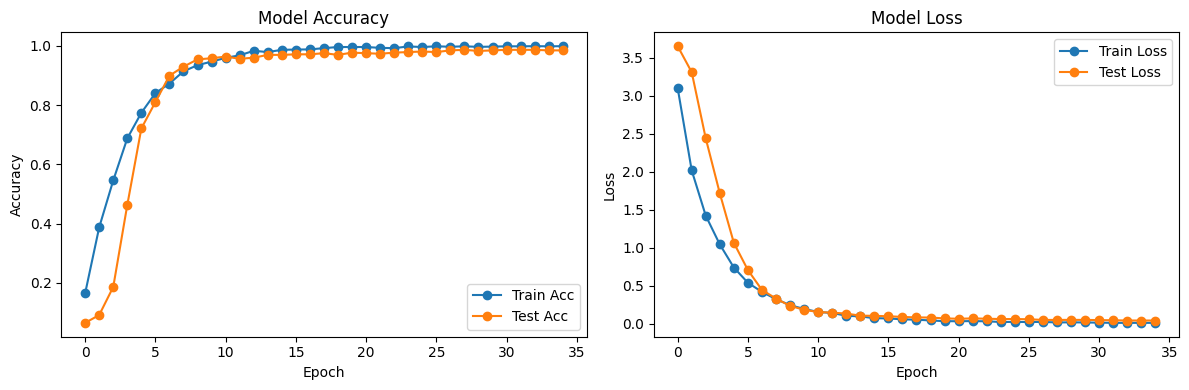

In [68]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v2.history.get('accuracy', [])
test_acc = history_v2.history.get('val_accuracy', [])
loss = history_v2.history.get('loss', [])
test_loss = history_v2.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Train and Test Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc', marker='o')
plt.plot(epochs_range, test_acc, label='Test Acc', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Train and Test Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Test Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [76]:
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step
Precision: 0.9854798299248015
Recall: 0.9848197343453511
F1 Score: 0.9848332782510497
Log Loss: 2.1047044885974873
Accuracy: 0.9848197343453511


              precision    recall  f1-score   support

          ba       1.00      0.96      0.98        28
          ca       1.00      1.00      1.00        28
          da       1.00      1.00      1.00        26
         dha       1.00      1.00      1.00        36
          ga       1.00      1.00      1.00        24
          ha       0.92      0.96      0.94        24
          ja       1.00      1.00      1.00        27
          ka       1.00      0.95      0.97        20
          la       1.00      0.94      0.97        32
          Ma       1.00      1.00      1.00        27
          na       1.00      1.00      1.00        30
         nga       0.94      0.88      0.91        17
         nya       1.00      1.00      1.00        28
          pa       0.92      1.00      0.96        23
          ra       1.00      1.00      1.00        21
          sa       1.00      1.00      1.00        24
          ta       0.96      1.00      0.98        26
         tha       0.93    

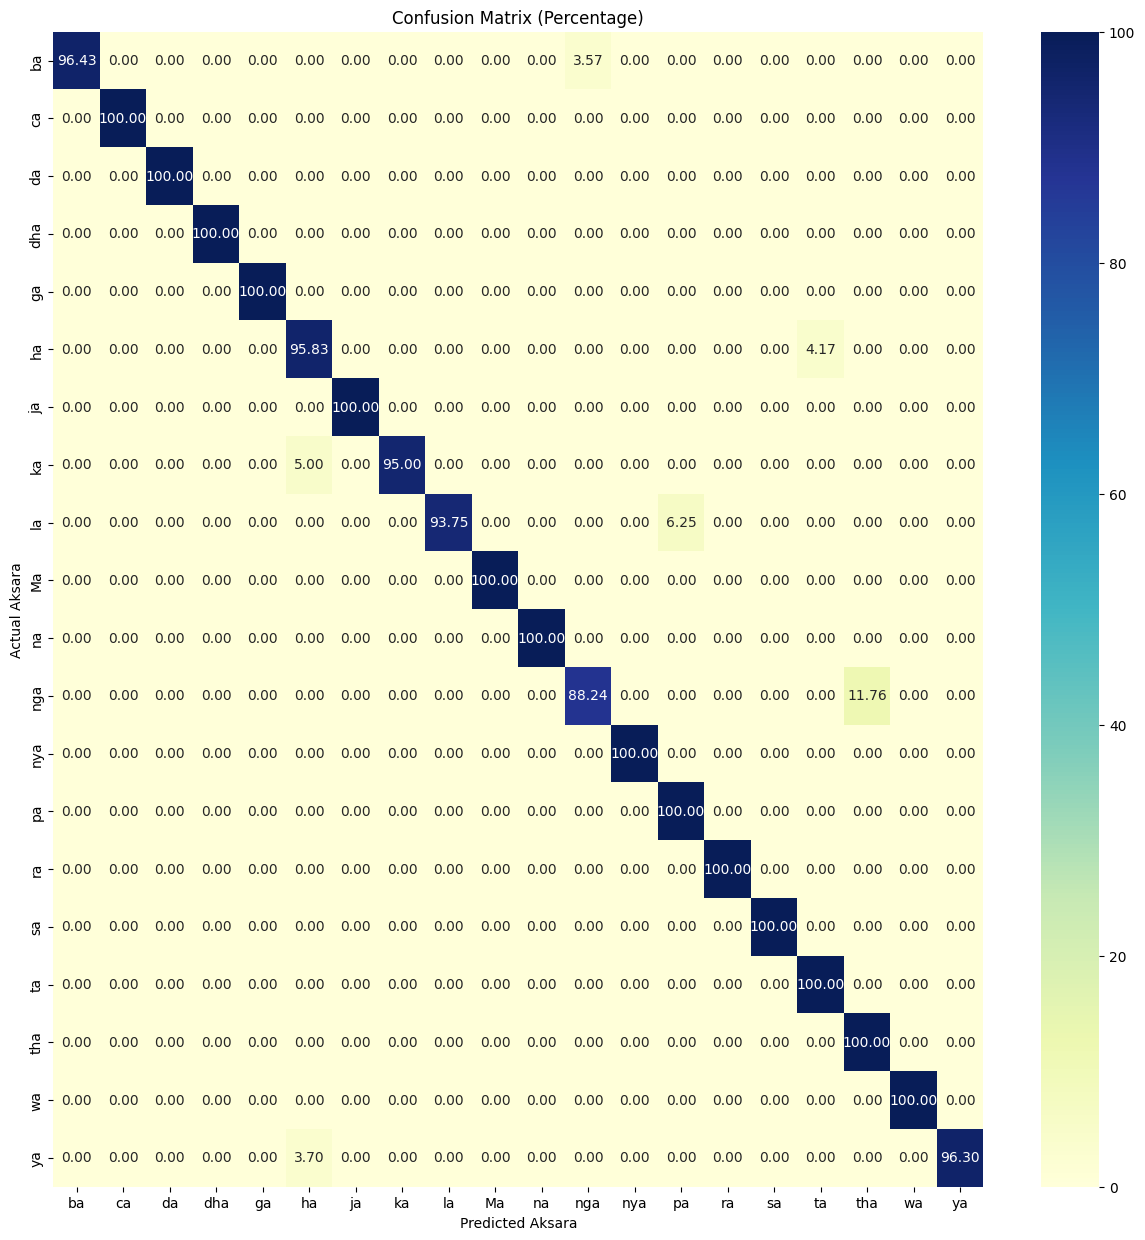

In [78]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 3 - Dropout(0.1) + learning_rate=0.0001 + weight_decay=1e-2

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model with vgg16 architecture (5 blocks)
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(20, activation='softmax'))

In [90]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.0001, weight_decay=1e-2)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 110, 110, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 110, 110, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,121,876 (8.09 MB)

 Trainable params: 2,117,844 (8.08 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [91]:
# Train the model
history_v3 = model.fit(X_train, 
                       y_train, 
                       epochs=35, 
                       batch_size=64, 
                       validation_data=(X_test, y_test))

Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.1145 - loss: 3.4513 - val_accuracy: 0.0930 - val_loss: 3.8836
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.3678 - loss: 2.1044 - val_accuracy: 0.1385 - val_loss: 3.0953
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.5879 - loss: 1.3638 - val_accuracy: 0.3302 - val_loss: 2.2905
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 182s 5s/step - accuracy: 0.7077 - loss: 0.9500 - val_accuracy: 0.5806 - val_loss: 1.4932
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.7836 - loss: 0.7011 - val_accuracy: 0.7362 - val_loss: 0.9370
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.8572 - loss: 0.4706 - val_accuracy: 0.8425 - val_loss: 0.5765
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.8984 - loss: 0.3608 - val_accuracy: 0.9241 - val_loss: 0.3459
Epoch 8/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.9301 - loss: 0.2837 - val_accuracy: 0.9583 - v

In [92]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 407ms/step - accuracy: 0.9908 - loss: 0.0341
Loss: 0.03799917921423912
Accuracy: 0.9905123114585876


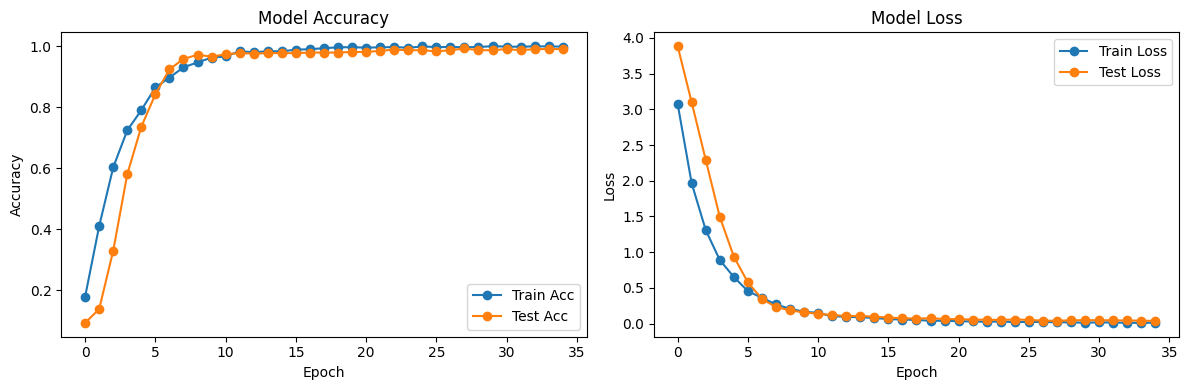

In [93]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v3.history.get('accuracy', [])
test_acc = history_v3.history.get('val_accuracy', [])
loss = history_v3.history.get('loss', [])
test_loss = history_v3.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Train and Test Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc', marker='o')
plt.plot(epochs_range, test_acc, label='Test Acc', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Train and Test Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Test Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [94]:
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 381ms/step
Precision: 0.9922065600433722
Recall: 0.9905123339658444
F1 Score: 0.9908693871681269
Log Loss: 2.100866681829938
Accuracy: 0.9905123339658444


              precision    recall  f1-score   support

          ba       1.00      1.00      1.00        28
          ca       1.00      1.00      1.00        28
          da       1.00      1.00      1.00        26
         dha       1.00      0.97      0.99        36
          ga       1.00      1.00      1.00        24
          ha       1.00      1.00      1.00        24
          ja       1.00      1.00      1.00        27
          ka       1.00      1.00      1.00        20
          la       1.00      0.94      0.97        32
          Ma       1.00      1.00      1.00        27
          na       1.00      1.00      1.00        30
         nga       1.00      1.00      1.00        17
         nya       1.00      1.00      1.00        28
          pa       0.82      1.00      0.90        23
          ra       1.00      1.00      1.00        21
          sa       1.00      1.00      1.00        24
          ta       1.00      1.00      1.00        26
         tha       1.00    

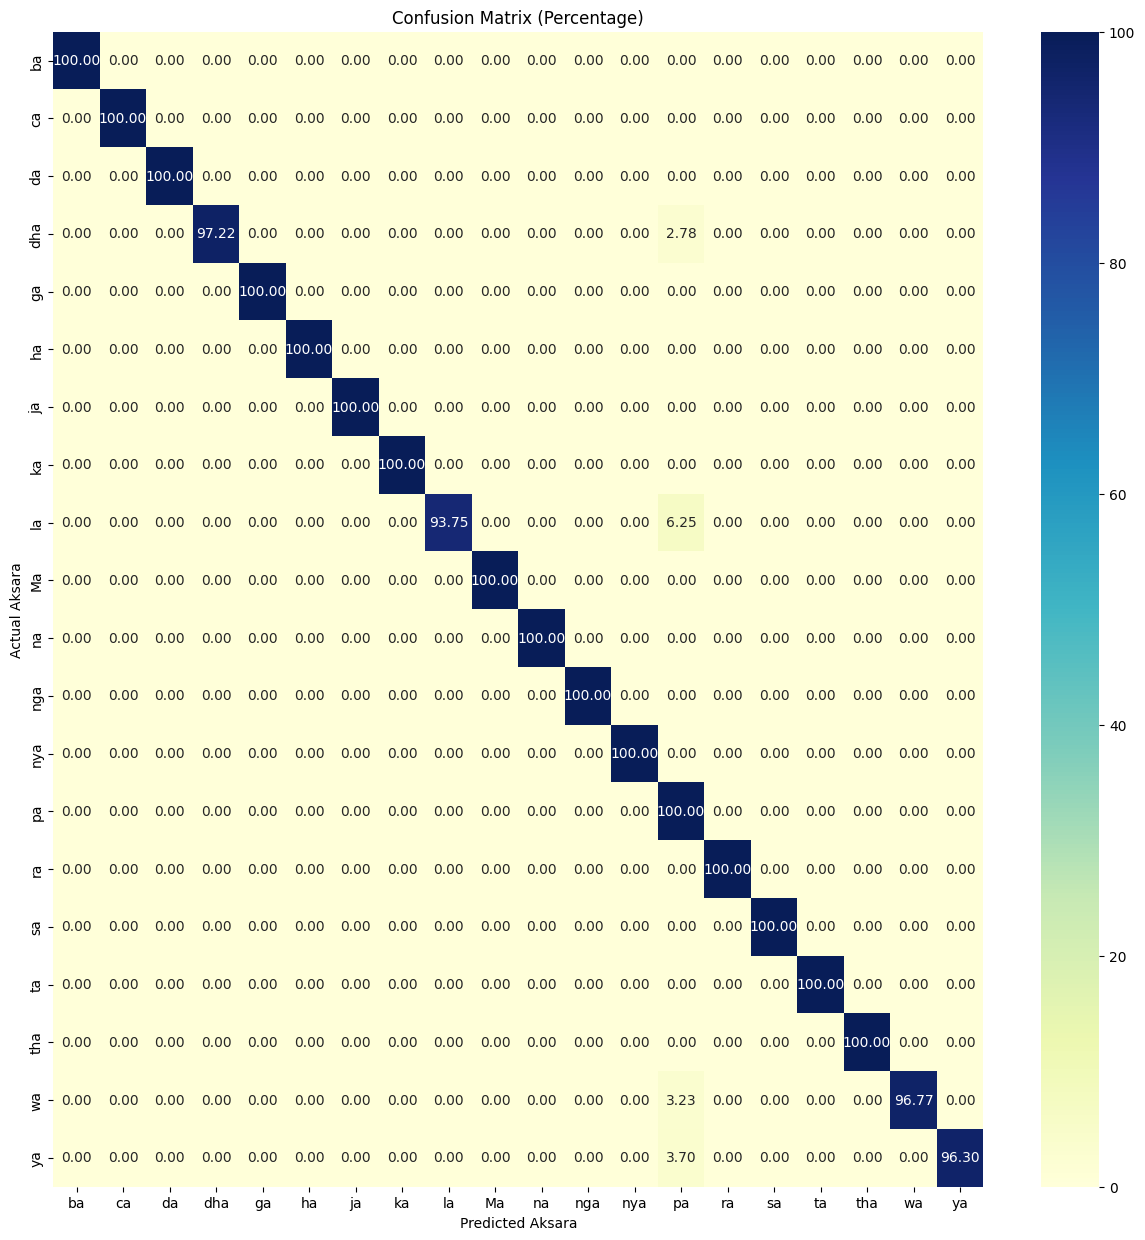

In [95]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 4 - Dropout(0.1) + learning_rate=0.0001 + weight_decay=1e-2 + clipvalue=0.1

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model with vgg16 architecture (5 blocks)
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(20, activation='softmax'))

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.0001, weight_decay=1e-2, clipvalue=0.1)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_110 (Conv2D)             │ (None, 110, 110, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_132         │ (None, 110, 110, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_110               │ (None, 55, 55, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_132 (Dropout)           │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_133         │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_111               │ (None, 26, 26, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_133 (Dropout)           │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_112 (Conv2D)             │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_134         │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_112               │ (None, 12, 12, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_134 (Dropout)           │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_113 (Conv2D)             │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_135         │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_113               │ (None, 5, 5, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_135 (Dropout)           │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_114 (Conv2D)             │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_136         │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 1, 1, 512)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_136 (Dropout)           │ (None, 1, 1, 512)      │             

 Total params: 2,121,876 (8.09 MB)

 Trainable params: 2,117,844 (8.08 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [110]:
# Train the model
history_v4 = model.fit(X_train, 
                       y_train, 
                       epochs=35, 
                       batch_size=64, 
                       validation_data=(X_test, y_test))

Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 203s 5s/step - accuracy: 0.1372 - loss: 3.3106 - val_accuracy: 0.1139 - val_loss: 3.9009
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 249s 7s/step - accuracy: 0.4222 - loss: 1.9345 - val_accuracy: 0.1556 - val_loss: 3.3923
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 226s 6s/step - accuracy: 0.6055 - loss: 1.2592 - val_accuracy: 0.2827 - val_loss: 2.4342
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 192s 5s/step - accuracy: 0.7352 - loss: 0.8501 - val_accuracy: 0.5958 - val_loss: 1.4072
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 213s 6s/step - accuracy: 0.8035 - loss: 0.6206 - val_accuracy: 0.8027 - val_loss: 0.7444
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 0.8875 - loss: 0.3953 - val_accuracy: 0.8994 - val_loss: 0.4317
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - accuracy: 0.9279 - loss: 0.2781 - val_accuracy: 0.9469 - val_loss: 0.2607
Epoch 8/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 176s 5s/step - accuracy: 0.9444 - loss: 0.2391 - val_accuracy: 0.9639 - v

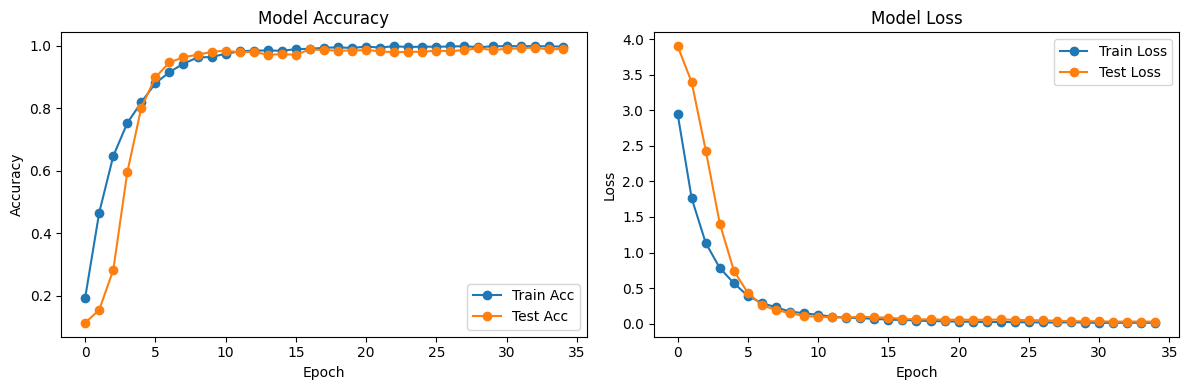

In [111]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v4.history.get('accuracy', [])
test_acc = history_v4.history.get('val_accuracy', [])
loss = history_v4.history.get('loss', [])
test_loss = history_v4.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Train and Test Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc', marker='o')
plt.plot(epochs_range, test_acc, label='Test Acc', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Train and Test Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Test Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [112]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 374ms/step - accuracy: 0.9935 - loss: 0.0245
Loss: 0.02839614450931549
Accuracy: 0.9905123114585876


In [113]:
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 597ms/step
Precision: 0.9911078674646037
Recall: 0.9905123339658444
F1 Score: 0.9906041924238506
Log Loss: 2.0977897635663956
Accuracy: 0.9905123339658444


              precision    recall  f1-score   support

          ba       1.00      1.00      1.00        28
          ca       1.00      1.00      1.00        28
          da       1.00      1.00      1.00        26
         dha       1.00      0.97      0.99        36
          ga       1.00      1.00      1.00        24
          ha       0.92      1.00      0.96        24
          ja       1.00      1.00      1.00        27
          ka       0.95      0.95      0.95        20
          la       1.00      0.97      0.98        32
          Ma       1.00      1.00      1.00        27
          na       1.00      0.97      0.98        30
         nga       1.00      1.00      1.00        17
         nya       1.00      1.00      1.00        28
          pa       0.92      1.00      0.96        23
          ra       1.00      1.00      1.00        21
          sa       1.00      1.00      1.00        24
          ta       1.00      0.96      0.98        26
         tha       1.00    

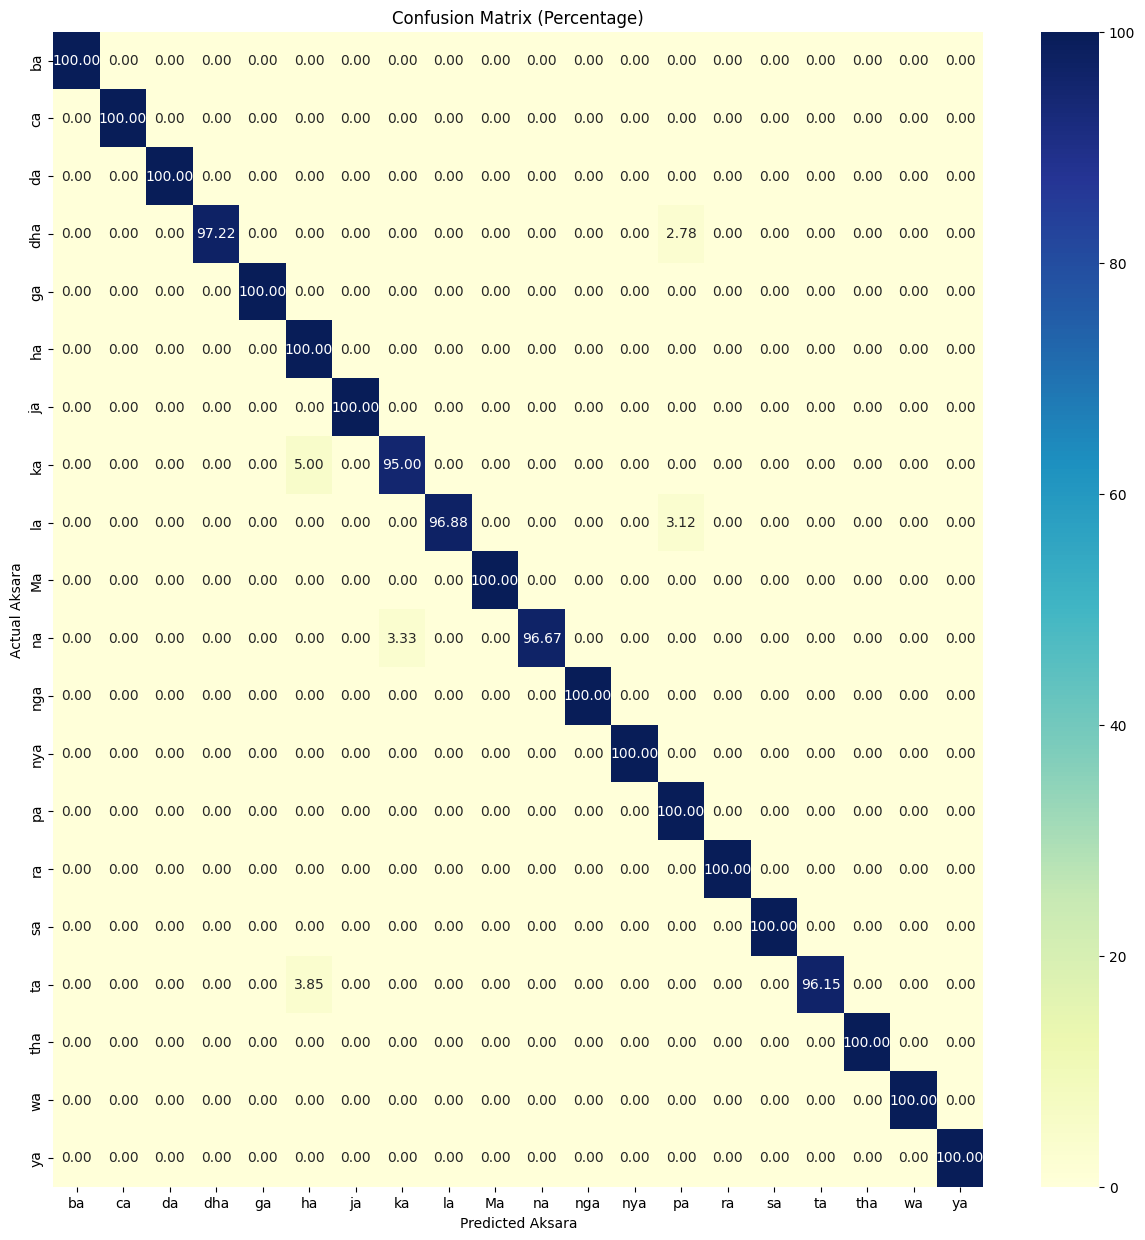

In [114]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 5 - Dropout(0.1) + learning_rate=0.0001 + weight_decay=1e-2 + clipvalue=0.1

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model with vgg16 architecture (5 blocks)
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(20, activation='softmax'))

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [136]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.0001, weight_decay=1e-2, clipvalue=0.1)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_121 (Conv2D)             │ (None, 112, 112, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_145         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_122 (Conv2D)             │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_146         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_120               │ (None, 56, 56, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_144 (Dropout)           │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_123 (Conv2D)             │ (None, 54, 54, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_147         │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_121               │ (None, 27, 27, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_145 (Dropout)           │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_124 (Conv2D)             │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_148         │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_122               │ (None, 12, 12, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_146 (Dropout)           │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_125 (Conv2D)             │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_149         │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_123               │ (None, 5, 5, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_147 (Dropout)           │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_126 (Conv2D)             │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_150         │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 2,131,252 (8.13 MB)

 Trainable params: 2,127,156 (8.11 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [137]:
# Train the model
history_v5 = model.fit(X_train, 
                       y_train, 
                       epochs=35, 
                       batch_size=64, 
                       validation_data=(X_test, y_test))

Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 525s 14s/step - accuracy: 0.1264 - loss: 3.3545 - val_accuracy: 0.1139 - val_loss: 3.0170
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 534s 16s/step - accuracy: 0.3582 - loss: 2.0923 - val_accuracy: 0.1746 - val_loss: 2.6906
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 454s 14s/step - accuracy: 0.5382 - loss: 1.4516 - val_accuracy: 0.3150 - val_loss: 2.2201
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 489s 15s/step - accuracy: 0.6623 - loss: 1.0545 - val_accuracy: 0.4934 - val_loss: 1.7058
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 461s 14s/step - accuracy: 0.7721 - loss: 0.7164 - val_accuracy: 0.6338 - val_loss: 1.2281
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 486s 15s/step - accuracy: 0.8561 - loss: 0.4986 - val_accuracy: 0.7211 - val_loss: 0.9076
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 459s 14s/step - accuracy: 0.8985 - loss: 0.3659 - val_accuracy: 0.7894 - val_loss: 0.6556
Epoch 8/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 522s 16s/step - accuracy: 0.9201 - loss: 0.2899 - val_accuracy: 0.

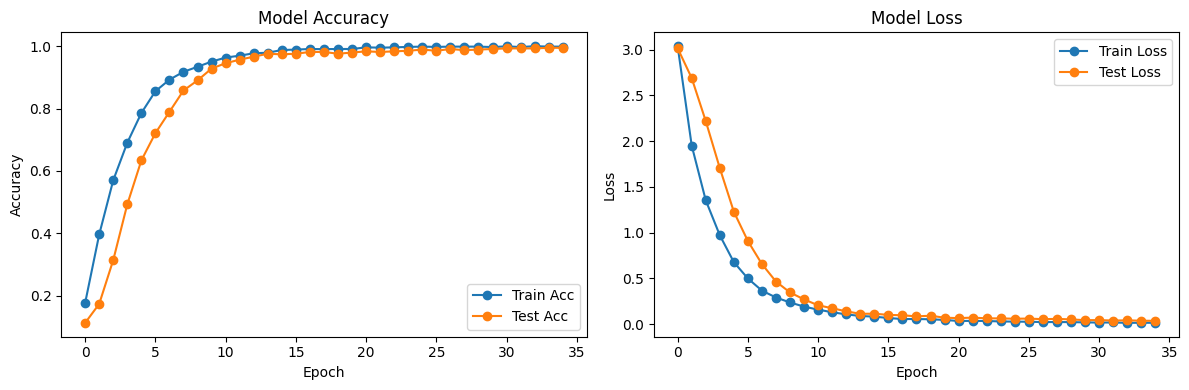

In [142]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v5.history.get('accuracy', [])
test_acc = history_v5.history.get('val_accuracy', [])
loss = history_v5.history.get('loss', [])
test_loss = history_v5.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Train and Test Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc', marker='o')
plt.plot(epochs_range, test_acc, label='Test Acc', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Train and Test Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Test Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [143]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 528ms/step - accuracy: 0.9948 - loss: 0.0364
Loss: 0.03473914787173271
Accuracy: 0.9943073987960815


In [144]:
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 431ms/step
Precision: 0.9949642387972558
Recall: 0.9943074003795066
F1 Score: 0.9944376873850566
Log Loss: 2.1030909062037066
Accuracy: 0.9943074003795066


              precision    recall  f1-score   support

          ba       1.00      1.00      1.00        28
          ca       1.00      1.00      1.00        28
          da       1.00      1.00      1.00        26
         dha       1.00      0.97      0.99        36
          ga       1.00      1.00      1.00        24
          ha       1.00      1.00      1.00        24
          ja       1.00      1.00      1.00        27
          ka       1.00      1.00      1.00        20
          la       1.00      0.97      0.98        32
          Ma       1.00      1.00      1.00        27
          na       1.00      1.00      1.00        30
         nga       1.00      1.00      1.00        17
         nya       1.00      1.00      1.00        28
          pa       0.88      1.00      0.94        23
          ra       1.00      1.00      1.00        21
          sa       1.00      1.00      1.00        24
          ta       1.00      1.00      1.00        26
         tha       1.00    

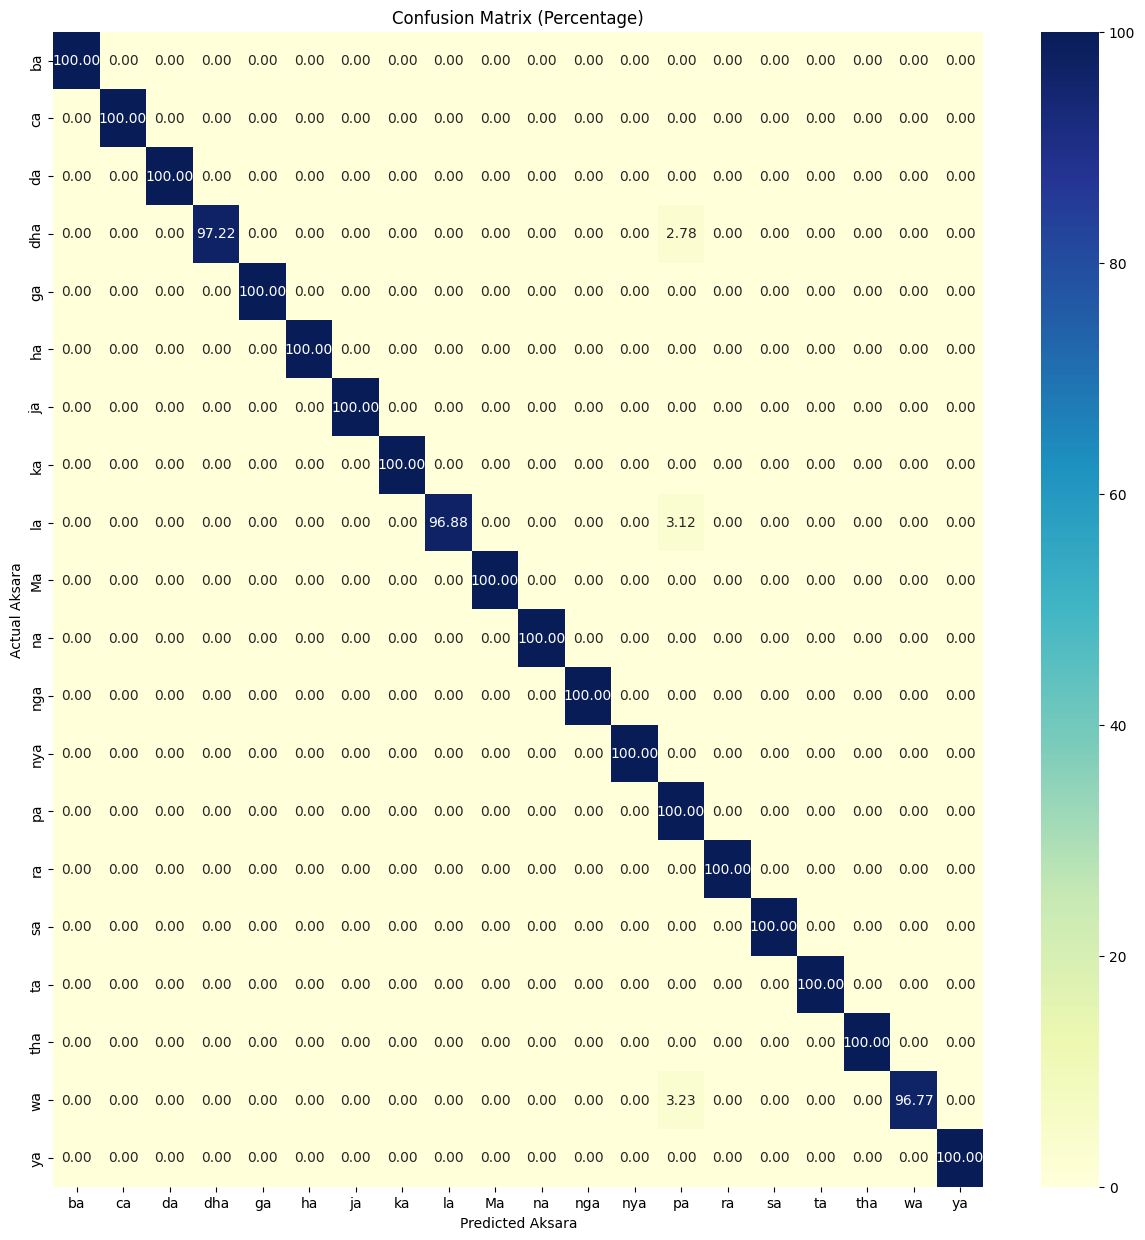

In [145]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 6 - Dropout(0.1) + learning_rate=0.0001 + weight_decay=1e-2 + clipvalue=0.1

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model with vgg16 architecture (5 blocks)
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(20, activation='softmax'))

In [15]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.0001, weight_decay=1e-2, clipvalue=0.1)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 11, 11, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 3, 3, 512)      │         2,04

 Total params: 2,168,436 (8.27 MB)

 Trainable params: 2,164,212 (8.26 MB)

 Non-trainable params: 4,224 (16.50 KB)

In [16]:
# Train the model
history_v6 = model.fit(X_train, 
                       y_train, 
                       epochs=35, 
                       batch_size=64, 
                       validation_data=(X_test, y_test))

Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 368s 10s/step - accuracy: 0.1005 - loss: 3.5001 - val_accuracy: 0.0873 - val_loss: 2.9607
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 234s 6s/step - accuracy: 0.3075 - loss: 2.3554 - val_accuracy: 0.2922 - val_loss: 2.6243
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 270s 8s/step - accuracy: 0.4744 - loss: 1.7272 - val_accuracy: 0.3491 - val_loss: 2.2615
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 295s 9s/step - accuracy: 0.6209 - loss: 1.2254 - val_accuracy: 0.4668 - val_loss: 1.8287
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 280s 8s/step - accuracy: 0.7086 - loss: 0.8851 - val_accuracy: 0.6281 - val_loss: 1.3106
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 336s 10s/step - accuracy: 0.8154 - loss: 0.5981 - val_accuracy: 0.7590 - val_loss: 0.9032
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 340s 10s/step - accuracy: 0.8677 - loss: 0.4705 - val_accuracy: 0.8197 - val_loss: 0.6330
Epoch 8/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 337s 10s/step - accuracy: 0.9017 - loss: 0.3422 - val_accuracy: 0.8824

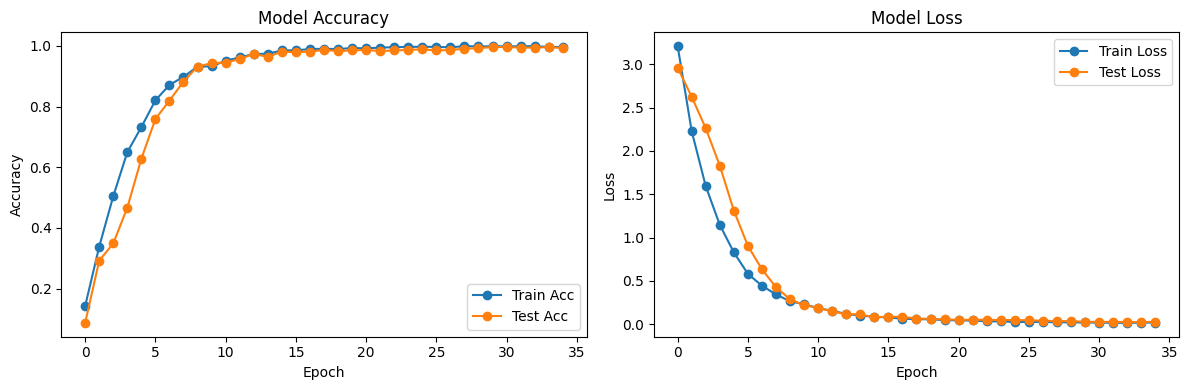

In [20]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v6.history.get('accuracy', [])
test_acc = history_v6.history.get('val_accuracy', [])
loss = history_v6.history.get('loss', [])
test_loss = history_v6.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Train and Test Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc', marker='o')
plt.plot(epochs_range, test_acc, label='Test Acc', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Train and Test Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Test Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [21]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 553ms/step - accuracy: 0.9930 - loss: 0.0249
Loss: 0.02622985653579235
Accuracy: 0.992409884929657


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
Precision: 0.9929098384221724
Recall: 0.9924098671726755
F1 Score: 0.9924391912659359
Log Loss: 2.0982040225311414
Accuracy: 0.9924098671726755


              precision    recall  f1-score   support

          ba       1.00      0.96      0.98        28
          ca       1.00      1.00      1.00        28
          da       1.00      1.00      1.00        26
         dha       1.00      1.00      1.00        36
          ga       1.00      1.00      1.00        24
          ha       0.96      1.00      0.98        24
          ja       1.00      1.00      1.00        27
          ka       0.91      1.00      0.95        20
          la       1.00      1.00      1.00        32
          Ma       1.00      0.96      0.98        27
          na       1.00      0.93      0.97        30
         nga       1.00      1.00      1.00        17
         nya       1.00      1.00      1.00        28
          pa       0.96      1.00      0.98        23
          ra       1.00      1.00      1.00        21
          sa       1.00      1.00      1.00        24
          ta       1.00      1.00      1.00        26
         tha       1.00    

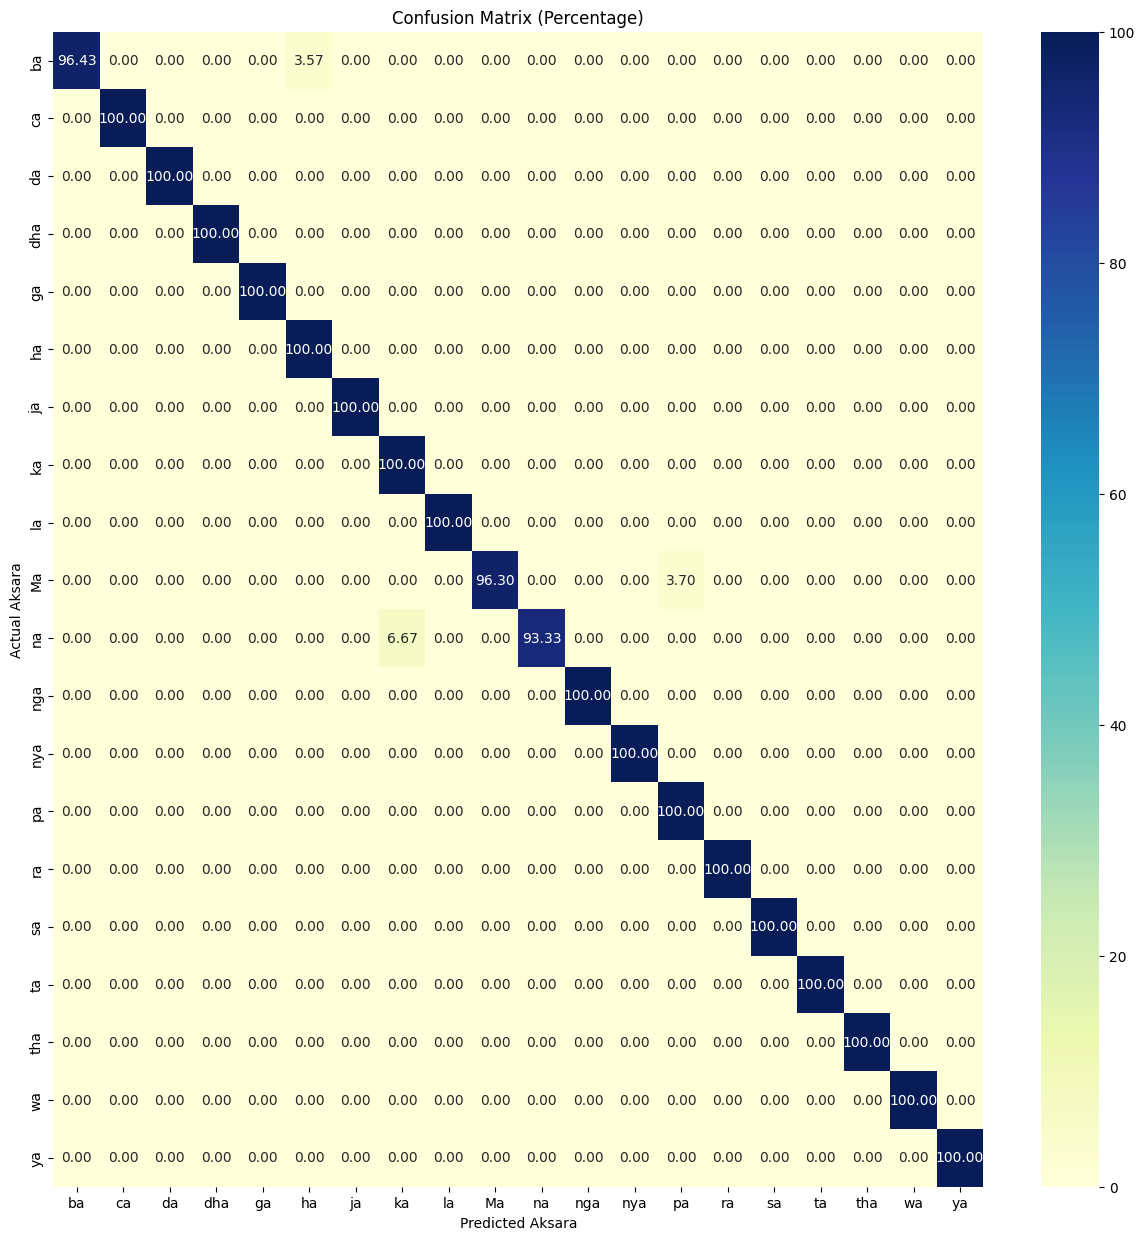

In [33]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 7 - Dropout(0.1) + learning_rate=0.0001 + weight_decay=1e-2 + clipvalue=0.1

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model with vgg16 architecture (5 blocks)
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(20, activation='softmax'))

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.0001, weight_decay=1e-2, clipvalue=0.1)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,037,492 (15.40 MB)

 Trainable params: 4,032,756 (15.38 MB)

 Non-trainable params: 4,736 (18.50 KB)

In [36]:
# Train the model
history_v7 = model.fit(X_train, 
                       y_train, 
                       epochs=35, 
                       batch_size=64, 
                       validation_data=(X_test, y_test))

Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 719s 21s/step - accuracy: 0.1220 - loss: 3.4195 - val_accuracy: 0.0778 - val_loss: 2.8399
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 623s 18s/step - accuracy: 0.4224 - loss: 1.9291 - val_accuracy: 0.0835 - val_loss: 3.1516
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 627s 19s/step - accuracy: 0.6343 - loss: 1.1201 - val_accuracy: 0.1195 - val_loss: 3.6653
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 726s 22s/step - accuracy: 0.7958 - loss: 0.6444 - val_accuracy: 0.1935 - val_loss: 3.5604
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 547s 16s/step - accuracy: 0.8911 - loss: 0.3879 - val_accuracy: 0.2581 - val_loss: 3.1417
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 523s 16s/step - accuracy: 0.9262 - loss: 0.2606 - val_accuracy: 0.3510 - val_loss: 2.6259
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 574s 18s/step - accuracy: 0.9609 - loss: 0.1670 - val_accuracy: 0.4649 - val_loss: 2.0168
Epoch 8/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 630s 19s/step - accuracy: 0.9759 - loss: 0.1134 - val_accuracy: 0.

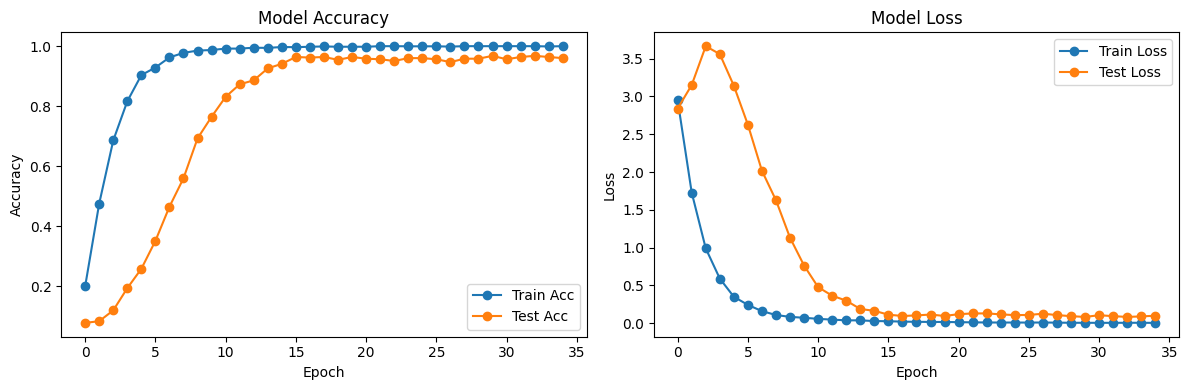

In [37]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v7.history.get('accuracy', [])
test_acc = history_v7.history.get('val_accuracy', [])
loss = history_v7.history.get('loss', [])
test_loss = history_v7.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Train and Test Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc', marker='o')
plt.plot(epochs_range, test_acc, label='Test Acc', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Train and Test Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Test Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [38]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9712 - loss: 0.0862
Loss: 0.09982999414205551
Accuracy: 0.9601517915725708


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step
Precision: 0.9713879914069667
Recall: 0.9601518026565465
F1 Score: 0.9618022658366798
Log Loss: 2.1364655606642056
Accuracy: 0.9601518026565465


              precision    recall  f1-score   support

          ba       1.00      1.00      1.00        28
          ca       1.00      0.86      0.92        28
          da       1.00      0.96      0.98        26
         dha       0.97      1.00      0.99        36
          ga       1.00      1.00      1.00        24
          ha       0.80      1.00      0.89        24
          ja       1.00      0.96      0.98        27
          ka       1.00      0.95      0.97        20
          la       1.00      0.94      0.97        32
          Ma       1.00      1.00      1.00        27
          na       1.00      1.00      1.00        30
         nga       1.00      1.00      1.00        17
         nya       1.00      1.00      1.00        28
          pa       0.64      1.00      0.78        23
          ra       1.00      1.00      1.00        21
          sa       0.96      0.96      0.96        24
          ta       1.00      0.88      0.94        26
         tha       1.00    

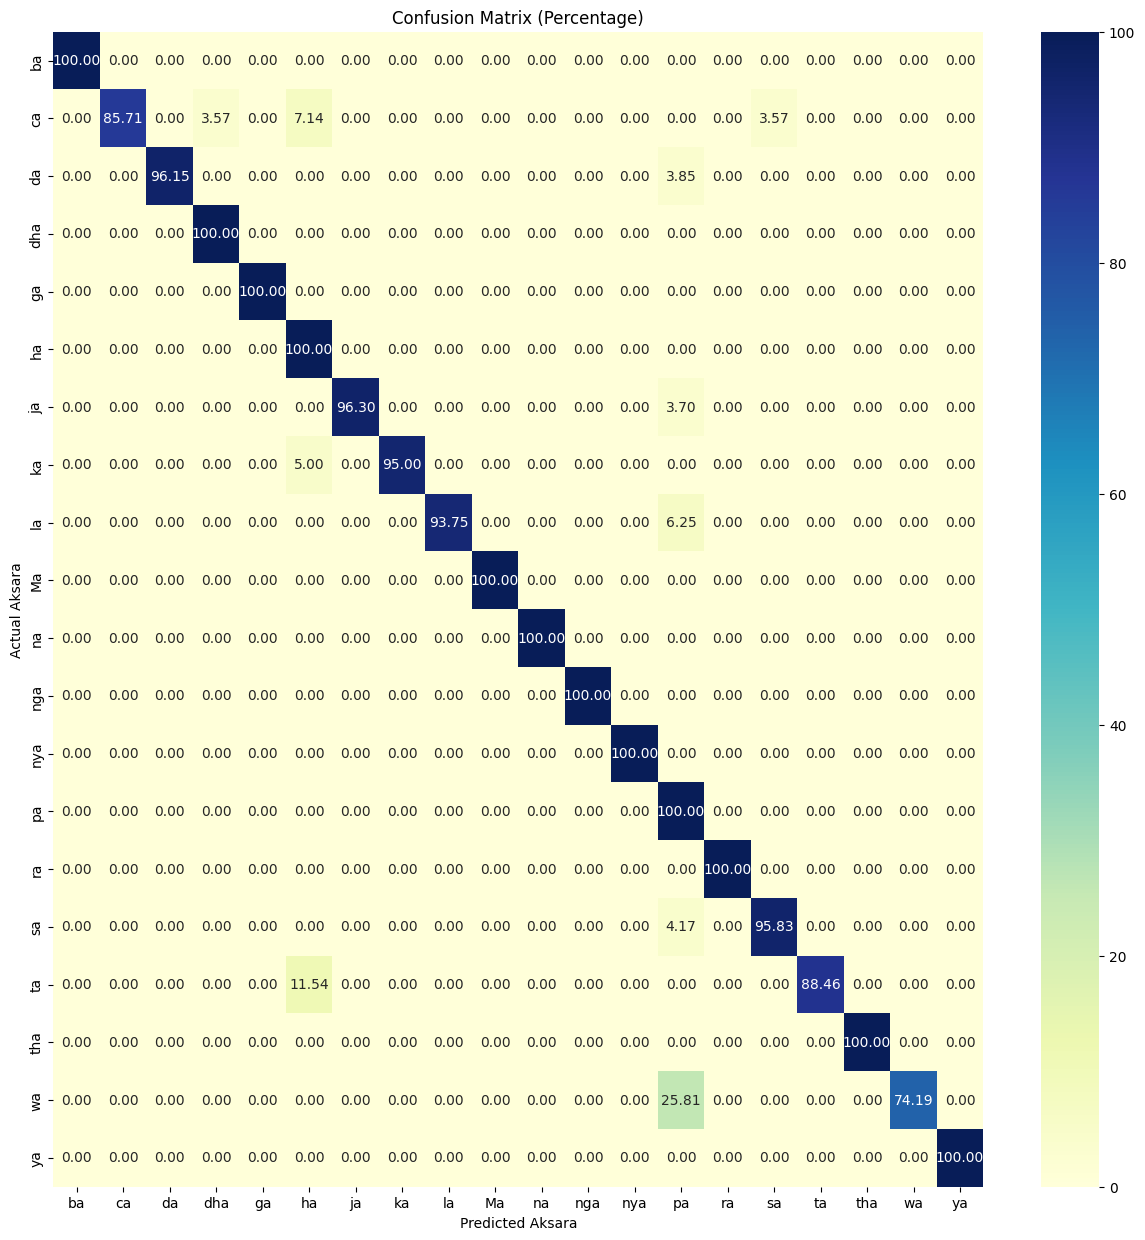

In [40]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()